README: The scripts below used to build the basic pipeline of classification modeling. <br>
 - scripts add countvectorizer() and tf-idf transformer to build word vectors; 
 - also remove non-Chinese characters, stopwords, digits, and punctuations.

*reference: manually adjust the sklearn predict threshold: https://stackoverflow.com/questions/19984957/scikit-predict-default-threshold <br>
TODO: try different scoring metrics and pick the best one

In [1]:
import pandas as pd
import os
import numpy as np
import time

import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
os.chdir('/Users/liyuan/desktop/CSAir/codes')
import json

from sklearn.naive_bayes import MultinomialNB  
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from tokenization import Tokenization
from prepare_data import PrepareData
from modeling import Modeling
from modeling_main import ReviewClassify

Using TensorFlow backend.


In [2]:
data_p = PrepareData()
data = data_p.load_data('../res/all_labeled_data.csv')
train, test = data_p.split_data()
X_train, y_train, X_test, y_test = data_p.preprocess_data()
labels_index = data_p.get_labels_index()
class_priors = data_p.get_class_priors()
class_size = data_p.get_class_size()

training data has 1139 examples
test data has 561 examples
the shape of train word vectors is (1139, 4246)
the shape of test word vectors is (561, 4246)


In [24]:
# checking
threshold_dct

{0: 0.18796574379727374,
 1: 0.2828389025867504,
 2: 0.14475778861682753,
 3: 0.19935923878729406,
 4: 0.17129252252774108,
 5: 0.2519656448358259,
 6: 0.10650442068236532,
 7: 0.04534635462321422,
 8: 0.06120707930093791,
 9: 0.20070940746445376}

In [3]:
# output encoded labels dictionary to txt file (finished)
labels_encoded_dct = {}
for k in data_p.labels_index.keys():
    # convert numpy int to python int
    labels_encoded_dct[k] = data_p.labels_index[k].item()

with open('../res/labels_encoded_dict.txt','w') as file:
    file.write(json.dumps(labels_encoded_dct, ensure_ascii=False))

there are 10 classes
user review indices that are classified as high probability of class 0: [6, 15, 40, 43, 44, 62, 77, 82, 100, 107, 136, 145, 148, 150, 153, 196, 198, 199, 205, 210, 214, 221, 229, 237, 251, 266, 274, 298, 300, 319, 324, 327, 340, 345, 350, 355, 358, 382, 395, 406, 420, 444, 463, 468, 470, 472, 518, 535, 547, 558]


565

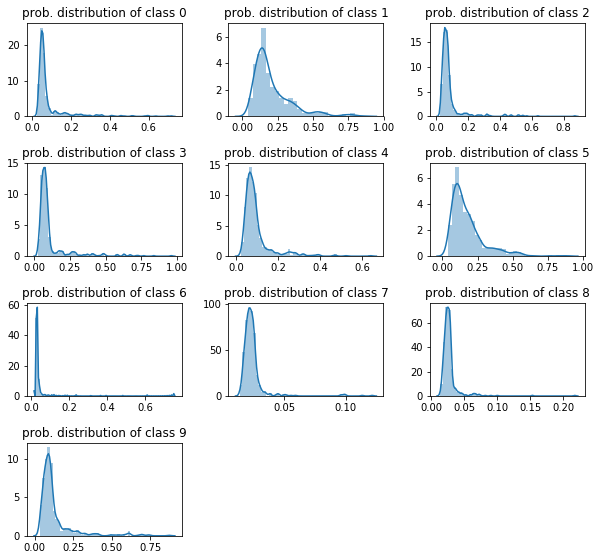

In [13]:
# funcitons below should return different results when passing on different models
m = Modeling(X_train, y_train, X_test, y_test)
prob_scores = m.get_label_prob(LogisticRegression())
threshold_dct = data_p.get_class_threshold(prob_scores)
# generate label based on threshold of each class
class_label_dct = m.gen_label_dct(prob_scores,threshold_dct)
class_reviews_dct = m.map_label_to_review(class_label_dct)
print('user review indices that are classified as high probability of class 0:', class_reviews_dct[0])
# checking
sum( [len(class_reviews_dct[i]) for i in range(10)])
# duplication exists in user reviews

try GridSearch ...


/anaconda3/envs/nlp/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


best parameters of clf are: 
{'alpha': 0.1}
performance of classifier:
              precision    recall  f1-score   support

           0       0.49      0.36      0.41        50
           1       0.49      0.63      0.55       134
           2       0.50      0.48      0.49        44
           3       0.60      0.58      0.59        67
           4       0.38      0.46      0.41        46
           5       0.67      0.71      0.69        94
           6       0.56      0.24      0.33        21
           7       0.50      0.07      0.12        15
           8       0.57      0.18      0.28        22
           9       0.51      0.53      0.52        68

   micro avg       0.53      0.53      0.53       561
   macro avg       0.53      0.42      0.44       561
weighted avg       0.53      0.53      0.52       561

Confusion matrix, without normalization
with adjusted class priors ...
performance of classifier:
              precision    recall  f1-score   support

           0     

0.5240641711229946

<Figure size 432x288 with 0 Axes>

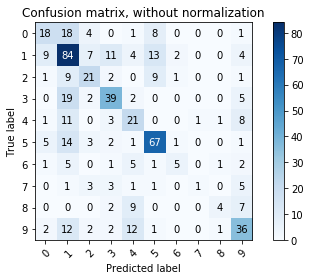

<Figure size 432x288 with 0 Axes>

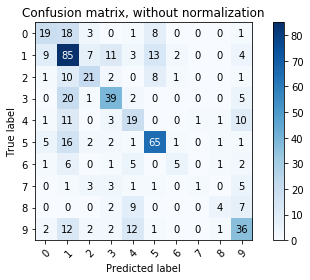

In [14]:
# naive bayes
print('try GridSearch ...')
model = MultinomialNB()
parameters = {'alpha':[0.001,0.01,0.1,1,5,10,100]}
best_params = m.grid_search(model, parameters)
print(best_params)

m = Modeling(X_train, y_train, X_test, y_test)
m.get_clf_result(MultinomialNB(alpha = 0.1))
print('=============================================')
print('with adjusted class priors ...')
m.get_clf_result(MultinomialNB(alpha = 0.1, class_prior=list(class_priors.values())))

Note: "support" is the number of true instances for each label
more explanation can be seen: 
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html#sklearn.metrics.precision_recall_fscore_support
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html


try GridSearch ...


/anaconda3/envs/nlp/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


best parameters of clf are: 
{'C': 1, 'penalty': 'l1'}
performance of classifier:
              precision    recall  f1-score   support

           0       0.65      0.52      0.58        50
           1       0.65      0.60      0.63       134
           2       0.63      0.50      0.56        44
           3       0.65      0.55      0.60        67
           4       0.39      0.24      0.30        46
           5       0.42      0.85      0.56        94
           6       0.64      0.43      0.51        21
           7       1.00      0.20      0.33        15
           8       0.00      0.00      0.00        22
           9       0.58      0.59      0.58        68

   micro avg       0.55      0.55      0.55       561
   macro avg       0.56      0.45      0.47       561
weighted avg       0.56      0.55      0.53       561

Confusion matrix, without normalization
with balanced class weights ...
performance of classifier:
              precision    recall  f1-score   support

     

0.5347593582887701

<Figure size 432x288 with 0 Axes>

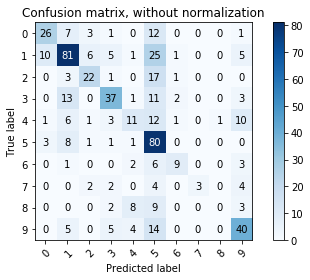

<Figure size 432x288 with 0 Axes>

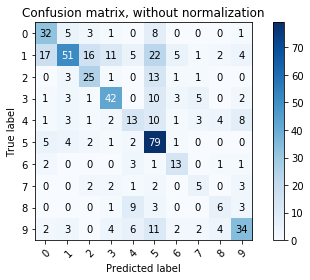

In [15]:
# logistic regression
print('try GridSearch ...')
model = LogisticRegression()
parameters = {'penalty':('l1', 'l2'), 'C':[0.1, 1, 10]}
best_params = m.grid_search(model, parameters)
print(best_params)

m.get_clf_result(LogisticRegression(C=1, penalty='l1'))
print ('==============================================')
print('with balanced class weights ...')
m.get_clf_result(LogisticRegression(C=1, penalty='l1', class_weight = 'balanced'))

try GridSearch ...
best parameters of clf are: 
{'C': 1.0, 'kernel': 'linear'}
performance of classifier:
              precision    recall  f1-score   support

           0       0.59      0.54      0.56        50
           1       0.56      0.63      0.59       134
           2       0.62      0.48      0.54        44
           3       0.74      0.60      0.66        67
           4       0.37      0.35      0.36        46
           5       0.56      0.79      0.65        94
           6       0.37      0.33      0.35        21
           7       0.75      0.20      0.32        15
           8       0.00      0.00      0.00        22
           9       0.54      0.60      0.57        68

   micro avg       0.56      0.56      0.56       561
   macro avg       0.51      0.45      0.46       561
weighted avg       0.55      0.56      0.54       561

Confusion matrix, without normalization
performance of classifier:
              precision    recall  f1-score   support

           0 

0.5864527629233511

<Figure size 432x288 with 0 Axes>

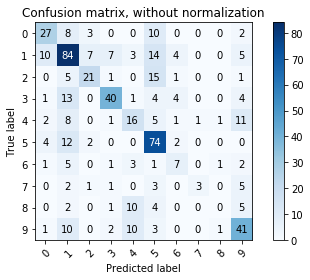

<Figure size 432x288 with 0 Axes>

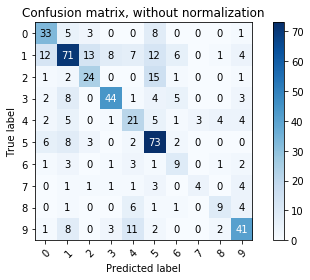

In [18]:
# linear SVC
print('try GridSearch ...')
model = SVC()
# parse into SVC parameters
parameters = {'C': [0.01,0.1,1.0,5,10,100],'kernel': ['rbf','linear']}
best_params = m.grid_search(model, parameters)
print(best_params)

m.get_clf_result(SVC(kernel='linear',C=1))
print('=========================================================')
m.get_clf_result(SVC(kernel='linear',C=1, class_weight = 'balanced'))